In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Acceptance-rejection sampling


## Rationale


[**Accept-reject sampling**](https://en.wikipedia.org/wiki/Rejection_sampling) allows to take samples from any unnormalized density $D_0$ and normalize them using another known density $D_1$.


A (unnormalized) $PDF$ of the target distribution has to be known.


## Code

Let's see how to apply this in Python. 

In [251]:
# Define params
SAMPLE_SIZE = 100000
N_BINS = np.sqrt(SAMPLE_SIZE).astype('int') // 2

Let's define and visualize our target distribution $p(x)$:

In [252]:
target_pdf = stats.norm(0, 1).pdf

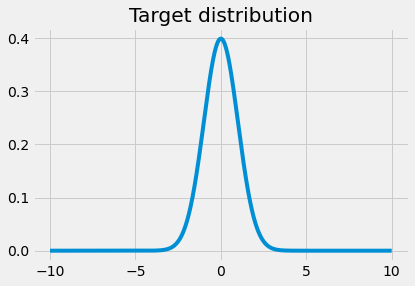

In [253]:
x = np.linspace(-10, 10, SAMPLE_SIZE)
plt.plot(x, target_pdf(x))
plt.title('Target distribution')
plt.show()

First, let's define the support of the target distribution.

In [254]:
target_pdf(np.array([-30, 30]))

array([1.47364613e-196, 1.47364613e-196])

We see that our target $PDF$ for values $-30$ and $30$ is virtually $0$.

We'll assume that this is the **finite support** of our **target**.

In [255]:
support = 30

Let's define our known proposal distribution $q(x)$.

It has to have a property that:

$$\large p(x) \leq M q(x)$$

where $M$ is some constant.

Let's initialize a uniform as our $q(x)$. 

Note that in `scipy.stats.uniform()` the following parametrization is used:

*In the standard form, the distribution is uniform on ``[0, 1]``. Using
the parameters ``loc`` and ``scale``, one obtains the uniform distribution
on ``[loc, loc + scale]``.*

Source: SciPy documentation

In [256]:
q_x = stats.uniform(-support, 2*support)

An important thing in **accept-reject** sampliong is that the **proposal distribution** must *envelope* the **target distribution**. 

Intuitively, the histogram of the **target** should be within the histogram of the **proposal**.

To make it happen, we need to scale $q(x)$. We'll use $M$ to achieve this.

In [257]:
# Compute M
m = np.ceil(np.max(target_pdf(x)) / np.max(q_x.pdf(x)))

m

24.0

Now, we'll draw samples from our proposal distribution $q(x)$:

In [258]:
qs = q_x.rvs(SAMPLE_SIZE)

Next, we're going to draw samples from $Uniform(0, 1)$:

In [259]:
unif = np.random.uniform(0, 1, SAMPLE_SIZE)

Finally we'll accept samples from $q(x)$ if:

$$ \large Unif_i \leq \frac{p(x_i)}{Mq(x_i)}$$

In [260]:
transformed = np.where(unif <= target_pdf(x) / (m * q_x.pdf(x)))[0].shape

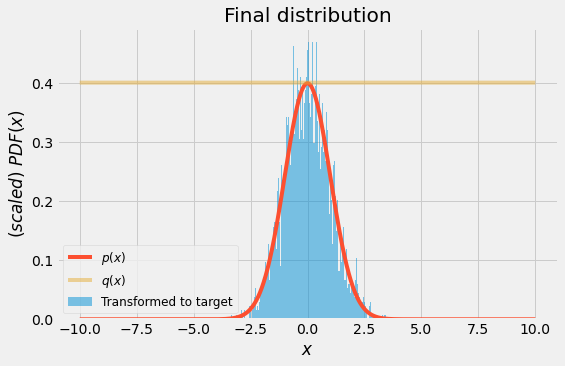

In [276]:
plt.figure(figsize=(8, 5))
plt.hist(transformed_to_normal, label='Transformed to target', bins=N_BINS, density=True, alpha=.5)
plt.plot(x, target_pdf(x), label='$p(x)$')
plt.plot(x, m * q_x.pdf(x), label='$q(x)$', alpha=.5)
plt.legend(fontsize=12)
plt.xlabel('$x$')
plt.ylabel('$(scaled) \ PDF(x)$')
plt.title('Final distribution')
plt.show()